In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [68]:
%pip install xgboost

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

#metricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


# Parte 2

In [46]:
# ler arquivo       
dados = pd.read_csv('../Inteligencia_artificial/LPL/dados_salarial_funcionarios.csv')

In [47]:
# Listando o nome das colunas
dados.columns

Index(['Idade', 'Genero', 'Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
       'Faixa Salarial', 'Anos experiencia', 'Faixa Salarial – numero',
       'Data ultimo aumento'],
      dtype='object')

In [48]:
# Imprimindo as 5 primeiras linhas
dados.head()

,Idade,Genero,Nivel Ensino,Area Formacao,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento
0,38,Masculino,Pós-graduação,Química / Física,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,02/01/21
1,39,Masculino,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,06/04/21
2,30,Masculino,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,15/04/23
3,38,Feminino,Pós-graduação,Outras,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,04/06/21
4,36,Masculino,Pós-graduação,Outras Engenharias,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,22/03/23


In [49]:
# Observando número de linhas e colunas
dados.shape

(1385, 10)

---
## Parte 3: Análise Exploratória dos Dados (AED)

In [50]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas; float64 e int64 - variáveis numéricas
dados.dtypes

Idade                       int64
Genero                     object
Nivel Ensino               object
Area Formacao              object
Setor                      object
Nivel                      object
Faixa Salarial             object
Anos experiencia           object
Faixa Salarial – numero     int64
Data ultimo aumento        object
dtype: object

In [51]:
# Coluna Data ultimo aumento está como varivável de texto. É preciso transformá-la para data
# Função to_datetime do Pandas
dados['Data ultimo aumento'] = pd.to_datetime(dados['Data ultimo aumento'])

In [52]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [53]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,Idade,Faixa Salarial – numero,Data ultimo aumento
count,1385.000000,1385.000000,1385
mean,30.779783,9992.779783,2022-06-15 08:25:17.978339328
min,18.000000,1000.000000,2021-01-01 00:00:00
25%,26.000000,6000.000000,2021-09-19 00:00:00
50%,29.000000,8000.000000,2022-06-09 00:00:00
75%,34.000000,12000.000000,2023-03-05 00:00:00
max,54.000000,45000.000000,2023-12-28 00:00:00
std,6.869018,7353.675097,NaN


In [54]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [55]:
# Verificando se existem valores faltantes nos dados 
dados.isna().any()

Idade                      False
Genero                     False
Nivel Ensino               False
Area Formacao               True
Setor                      False
Nivel                      False
Faixa Salarial             False
Anos experiencia           False
Faixa Salarial – numero    False
Data ultimo aumento        False
dtype: bool

In [56]:
# Verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

Idade                       0
Genero                      0
Nivel Ensino                0
Area Formacao              24
Setor                       0
Nivel                       0
Faixa Salarial              0
Anos experiencia            0
Faixa Salarial – numero     0
Data ultimo aumento         0
dtype: int64

In [57]:
# Substituir os valores faltantes por "Nada consta". Argumento inplace = true significa que a modificação será aplicada  
# Na mesma variável - chamada dados - sem precisar criar outra variável (dados_2, dados_V2, etc)
dados['Area Formacao'].fillna('Nada Consta', inplace=True)

In [58]:
# Ou então, podemos excluir a coluna com valor faltante, se não for relevante para a análise (atenção ao fazer isso)
dados.drop('Area Formacao', axis=1, inplace=True)

## axis = 1 - sentido da coluna; axis = 2 - sentido das linhas

In [59]:
# Depois das correções, verificando se ainda há valores faltantes
dados.isna().sum()

Idade                      0
Genero                     0
Nivel Ensino               0
Setor                      0
Nivel                      0
Faixa Salarial             0
Anos experiencia           0
Faixa Salarial – numero    0
Data ultimo aumento        0
dtype: int64

In [60]:
# Verificando se temos valores duplicados
dados.duplicated().sum() 

0

In [61]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

In [62]:
# nº de linhas e colunas após mudanças. Caso houvesse dados duplicados, o número de linhas seria reduzido
dados.shape

(1385, 9)

In [63]:
# Contagem de valores por categoria de 'Nivel'
dados['Nivel'].value_counts()

Nivel
Pleno     440
Júnior    409
Sênior    370
Gestor    166
Name: count, dtype: int64

In [64]:
# Contagem de valores por categoria de 'Faixa Salarial'
dados['Faixa Salarial'].value_counts()

Faixa Salarial
de R$ 8.001/mês a R$ 12.000/mês     295
de R$ 6.001/mês a R$ 8.000/mês      255
de R$ 4.001/mês a R$ 6.000/mês      242
de R$ 12.001/mês a R$ 16.000/mês    140
de R$ 3.001/mês a R$ 4.000/mês      113
de R$ 2.001/mês a R$ 3000/mês       108
de R$ 1.001/mês a R$ 2.000/mês       79
de R$ 16.001/mês a R$ 20.000/mês     59
de R$ 20.001/mês a R$ 25.000/mês     26
de R$ 25.001/mês a R$ 30.000/mês     22
Menos de R$ 1.000/mês                19
de R$ 30.001/mês a R$ 40.000/mês     18
Acima de R$ 40.001/mês                9
Name: count, dtype: int64

In [65]:
# Criando uma nova coluna
# Função para calcular a média salarial dos funcionários
dados['Média Salarial'] = dados['Faixa Salarial – numero'].mean().round()

In [66]:
# Resultado após inserção de nova coluna
dados.head()

,Idade,Genero,Nivel Ensino,Setor,Nivel,Faixa Salarial,Anos experiencia,Faixa Salarial – numero,Data ultimo aumento,Média Salarial
0,38,Masculino,Pós-graduação,Marketing,Gestor,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,6000,2021-02-01,9993.0
1,39,Masculino,Pós-graduação,Consultoria,Gestor,de R$ 6.001/mês a R$ 8.000/mês,de 2 a 3 anos,8000,2021-06-04,9993.0
2,30,Masculino,Pós-graduação,Indústria,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-04-15,9993.0
3,38,Feminino,Pós-graduação,Serviços,Gestor,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,16000,2021-04-06,9993.0
4,36,Masculino,Pós-graduação,Varejo,Gestor,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,12000,2023-03-22,9993.0


---
# Parte 4: Visualização dos resultados

#### O que queremos responder com esses dados?

### 1. Distribuição do nº de funcionários por sexo, nível de senioridade e nível de formação

Podemos fazer um gráfico com a distribuição de homens e mulheres

In [29]:
# Contagem do nº de homens e mulheres na empresa
valores_contados_1 = dados['Genero'].value_counts()
print(valores_contados_1)

Genero
Masculino    979
Feminino     406
Name: count, dtype: int64


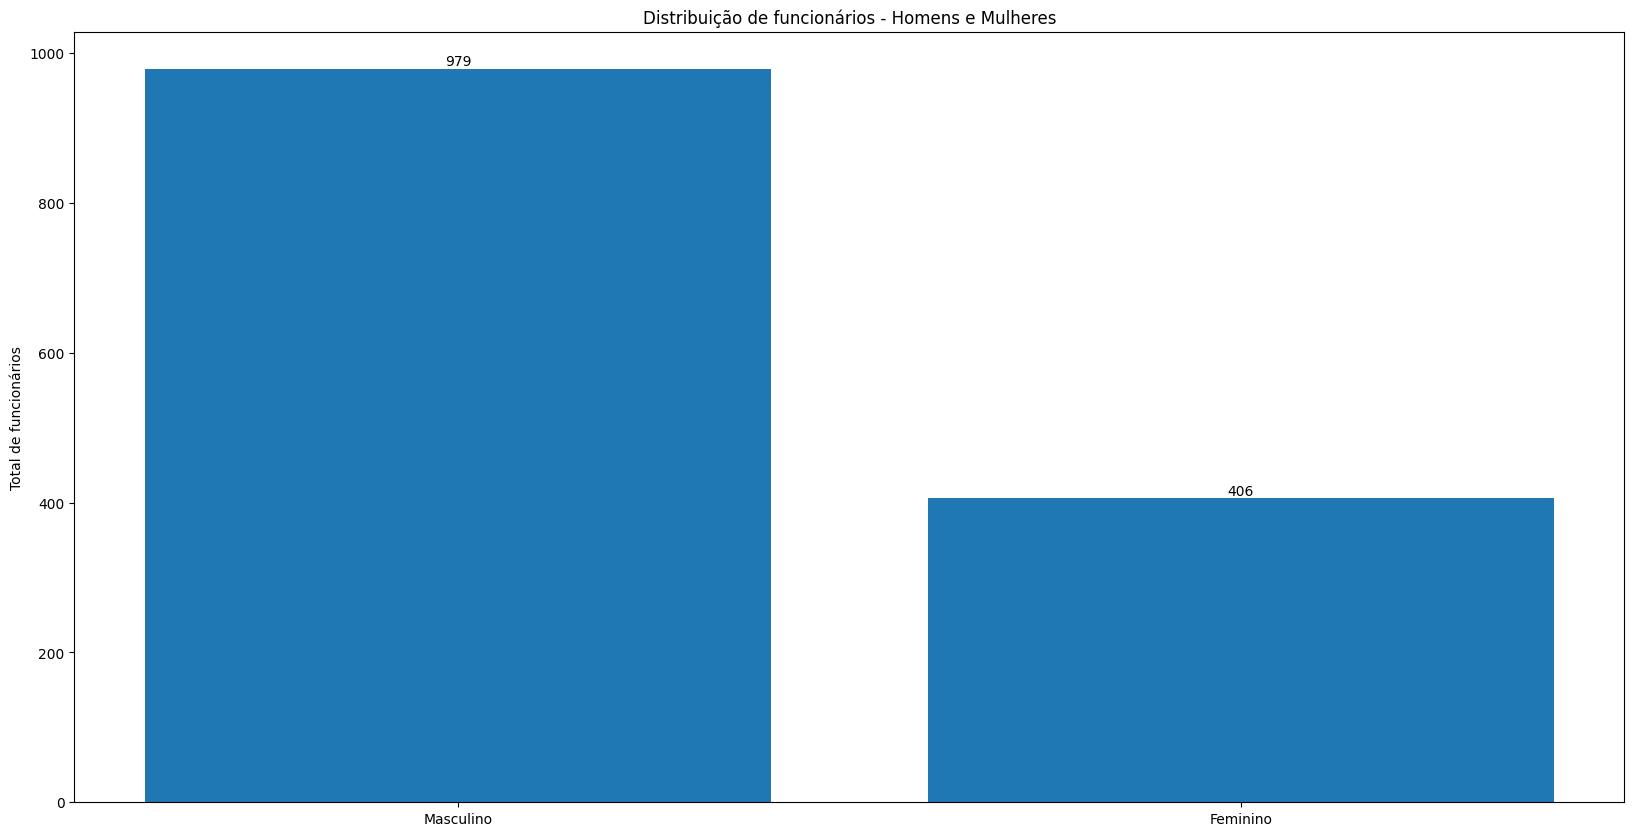

In [30]:
# Gráfico da distribuição por gênero - plt é a biblioteca Matplotlib
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(valores_contados_1.index, valores_contados_1.values) # Variavel Nivel Ensino no eixo X
plt.title('Distribuição de funcionários - Homens e Mulheres') # plt.title para inserir título no gráfico
plt.ylabel('Total de funcionários'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_1, size=10);

# Parte 5 Organização de dados

In [ ]:
sns.boxplot(dados['Faixa Salarial – numero']).set_title('Distribuição dos salarios');

# Bolinhas OUTLAIRS
# Salarios muito diferentes do padrão
# Outlairs são valores que fogem do padrão

KeyError: 'Faixa Salarial - numero'

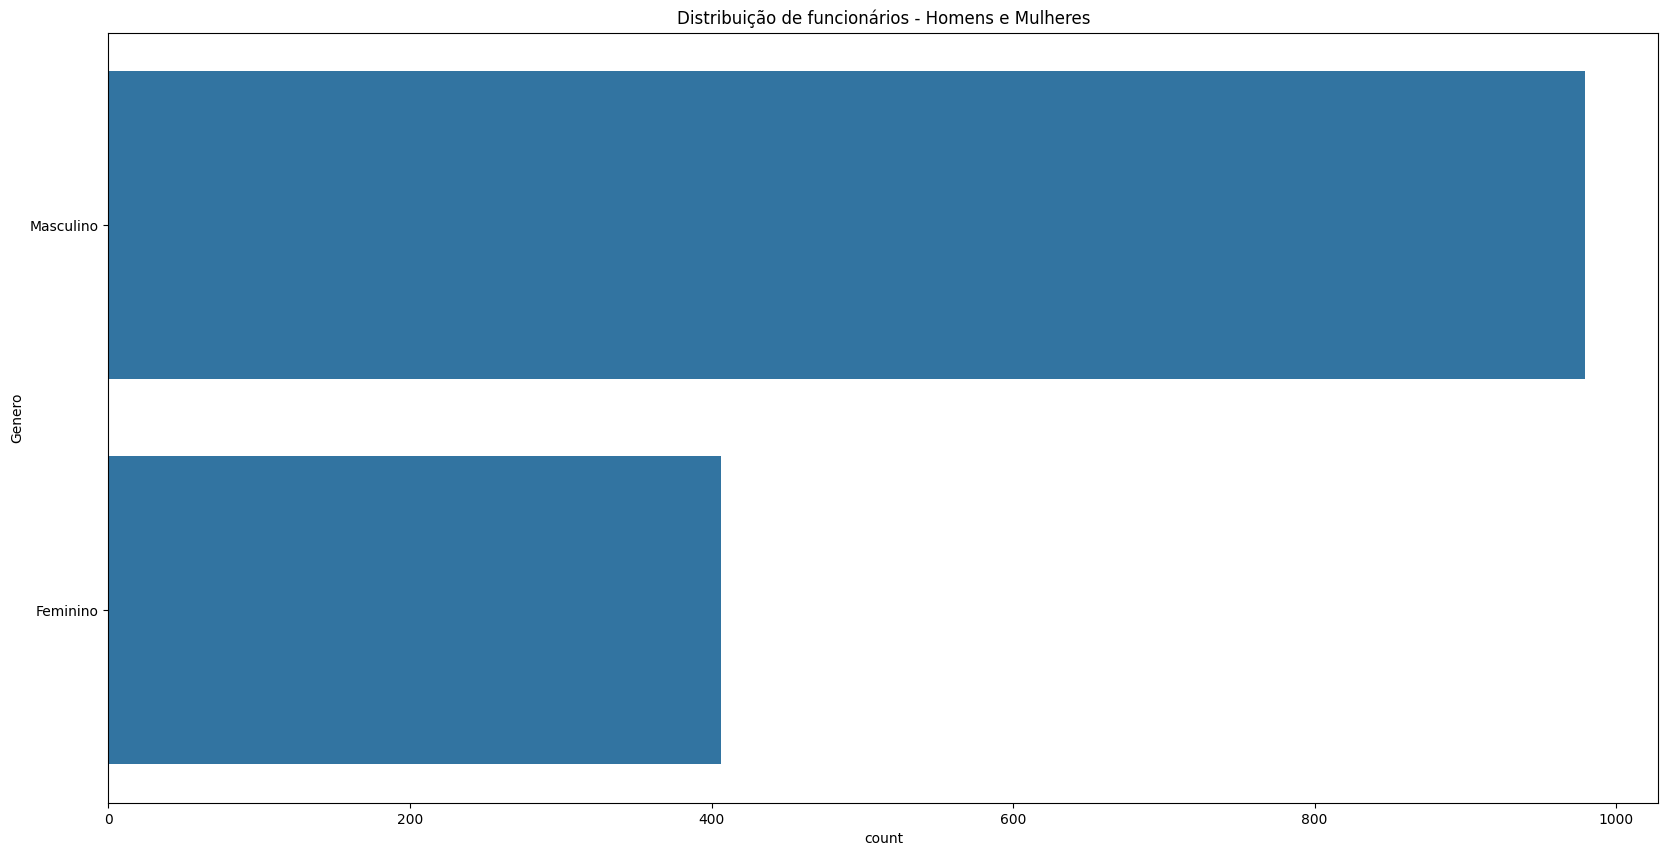

In [31]:
# Gráfico da biblioteca sns - Seaborn

# sns.countplot para criar gráfico de barras. Eixo X é a contagem (número de valores), eixo Y é a coluna de ordenação
# index para ordenar os valores
plt.figure(figsize=(20,10))
sns.countplot(y="Genero", data=dados, order=dados['Genero'].value_counts().index) \
.set_title("Distribuição de funcionários - Homens e Mulheres"); # set.title para inserir nome do gráfico

In [32]:
valores_contados_2 = dados['Nivel Ensino'].value_counts()
print(valores_contados_2)

Nivel Ensino
Graduação/Bacharelado         495
Pós-graduação                 452
Mestrado                      185
Estudante de Graduação        173
Doutorado ou Phd               56
Não tenho graduação formal     24
Name: count, dtype: int64


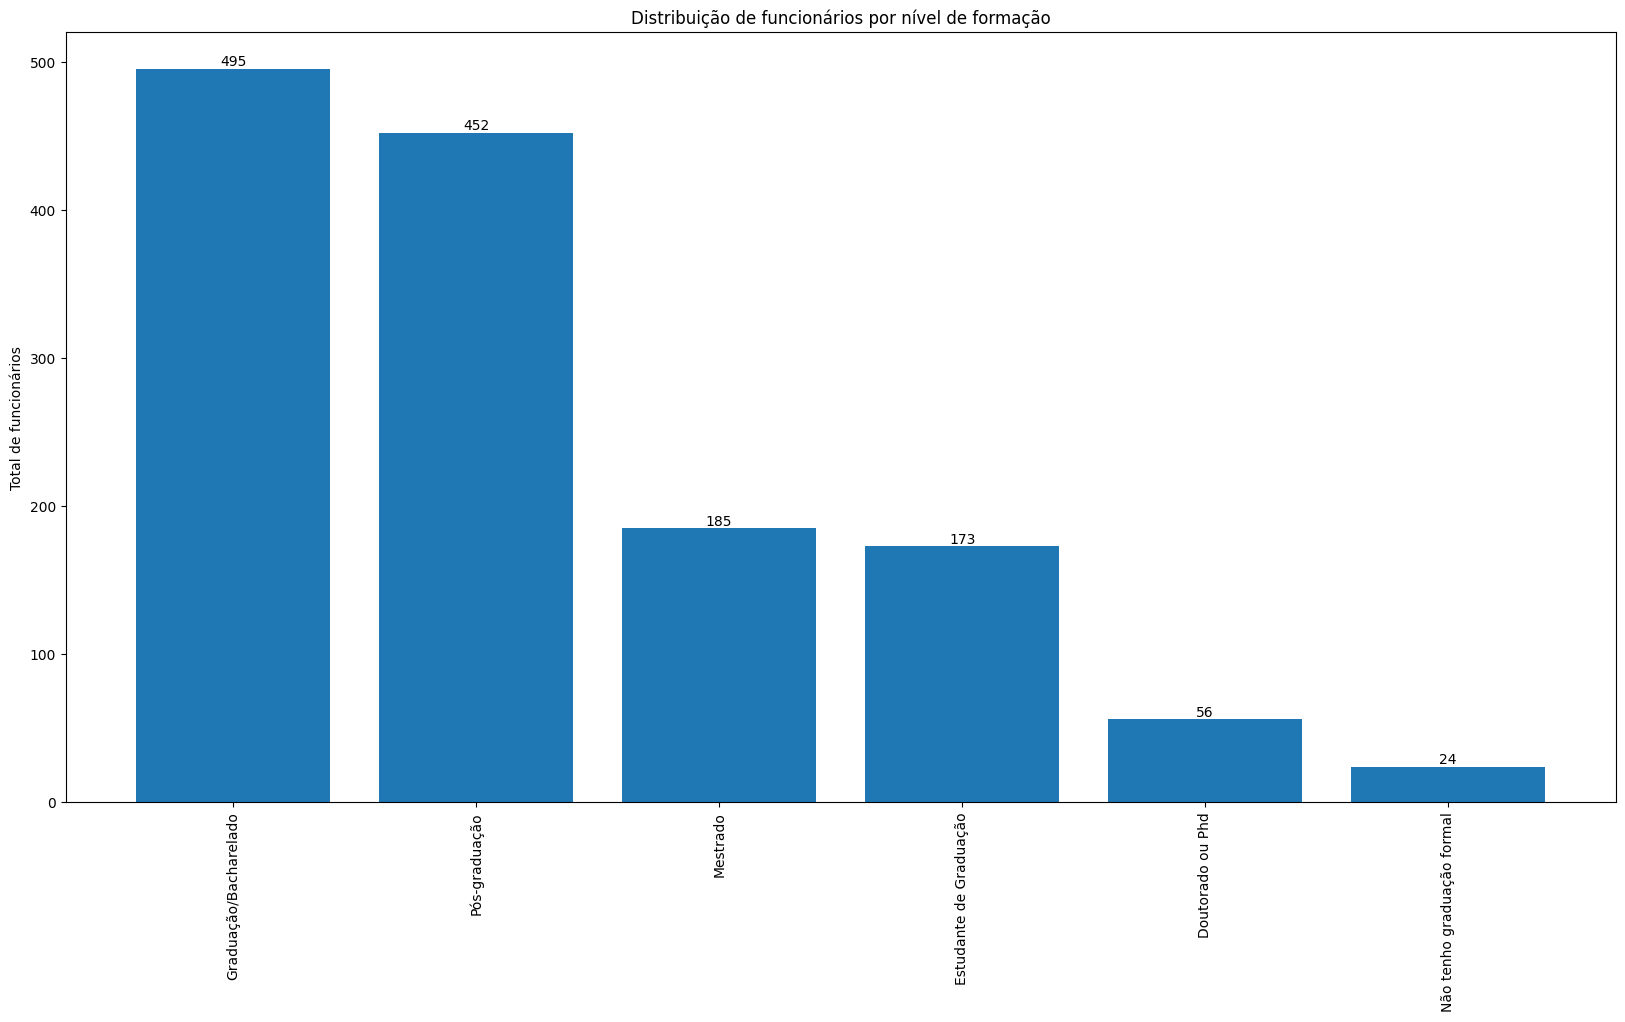

In [35]:
plt.figure(figsize=(20,10))
grafico_2 = plt.bar(valores_contados_2.index, valores_contados_2.values) # Variavel Nivel Ensino no eixo X
plt.title('Distribuição de funcionários por nível de formação') # Inserção do título
plt.ylabel('Total de funcionários') # Rótulo do eixo Y
plt.xticks(rotation=90); # xticks para indicar a rotação do texto no eixo X (90 graus)
plt.bar_label(grafico_2, size=10);

In [34]:
valores_contados_3 = dados['Nivel'].value_counts()
print(valores_contados_3)

Nivel
Pleno     440
Júnior    409
Sênior    370
Gestor    166
Name: count, dtype: int64


---
### 2. Evolução da média salarial ao longo do tempo, com base na data de último aumento

In [39]:
# Criando uma coluna somente com o ano de aumento
dados['Data ultimo aumento - Ano']=dados['Data ultimo aumento'].dt.year
dados.dtypes

Idade                                 int64
Genero                               object
Nivel Ensino                         object
Setor                                object
Nivel                                object
Faixa Salarial                       object
Anos experiencia                     object
Faixa Salarial – numero               int64
Data ultimo aumento          datetime64[ns]
Média Salarial                      float64
Data ultimo aumento - Ano             int32
dtype: object

In [40]:
# Calculando a média por ano (coluna Data ultimo aumento - Ano) para saber se os salários aumentaram ou diminuíram entre 2021 e 2023
media_salarial_ano = dados.groupby(['Data ultimo aumento - Ano', 'Genero'])['Faixa Salarial – numero'].mean().round(0) # round para arrendodar
media_salarial_ano.head()

Data ultimo aumento - Ano  Genero   
2021                       Feminino      9695.0
                           Masculino     9495.0
2022                       Feminino      9331.0
                           Masculino    11271.0
2023                       Feminino      9440.0
Name: Faixa Salarial – numero, dtype: float64

In [41]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_salarial_ano = media_salarial_ano.reset_index(name='Salario Medio')
media_salarial_ano.head()

,Data ultimo aumento - Ano,Genero,Salario Medio
0,2021,Feminino,9695.0
1,2021,Masculino,9495.0
2,2022,Feminino,9331.0
3,2022,Masculino,11271.0
4,2023,Feminino,9440.0


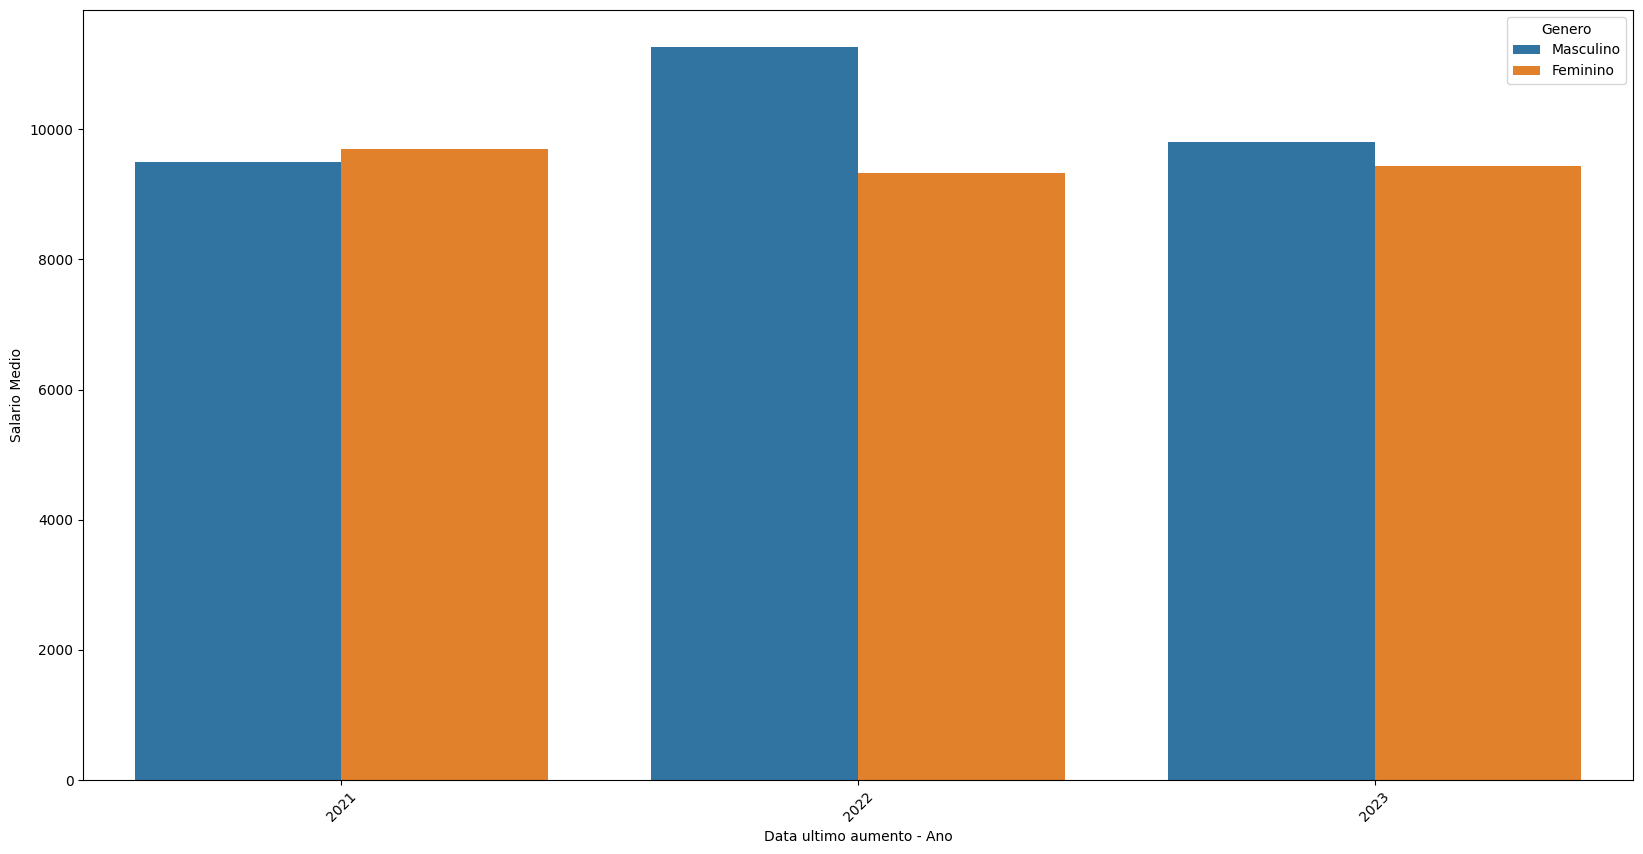

In [42]:
# Visualizando a média salarial por ano
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='Data ultimo aumento - Ano', y='Salario Medio', hue='Genero', data=media_salarial_ano, hue_order=['Masculino', 'Feminino'])
plt.xticks(rotation=45);


#### Houve um aumento médio no salário dos funcionários entre 2021 e 2022. Entre 2022 e 2023, houve uma queda

---
### 3. Distribuição salarial por nível de senioridade e gênero

In [43]:
# Agrupamento por gênero e nível do cargo - Júnior, Pleno, Sênior e Gestão
# Cálculo da média por nível do cargo e gênero
media_nivel_cargo = dados.groupby(['Genero', 'Nivel'])['Faixa Salarial – numero'].mean()
media_nivel_cargo.head()

Genero     Nivel 
Feminino   Gestor    16491.803279
           Júnior     4985.074627
           Pleno      8910.569106
           Sênior    12386.363636
Masculino  Gestor    16514.285714
Name: Faixa Salarial – numero, dtype: float64

In [44]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_nivel_cargo = media_nivel_cargo.reset_index(name='Salario Medio')
media_nivel_cargo.head()

,Genero,Nivel,Salario Medio
0,Feminino,Gestor,16491.803279
1,Feminino,Júnior,4985.074627
2,Feminino,Pleno,8910.569106
3,Feminino,Sênior,12386.363636
4,Masculino,Gestor,16514.285714


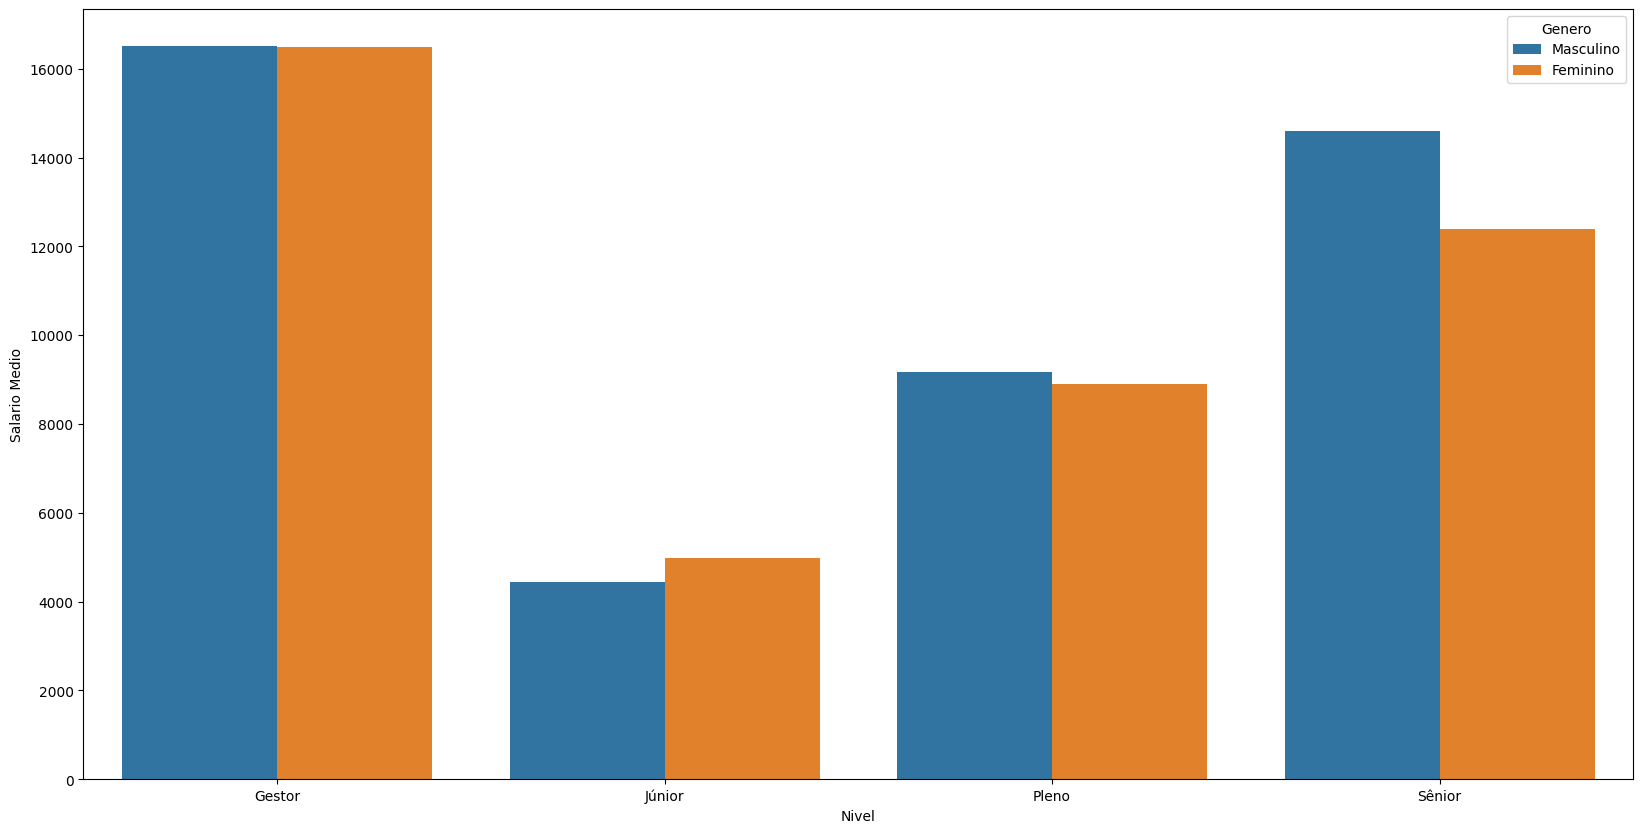

In [45]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel', y='Salario Medio', hue='Genero', data=media_nivel_cargo, hue_order=['Masculino', 'Feminino']);

---
### 4. Distribuição salarial por anos de experiência e gênero

### Vamos analisar os salários

Primeiro vamos fazer um histograma para analisar a distribuição geral dos salários

### Vamos analisar os salários

Primeiro vamos fazer um histograma para analisar a distribuição geral dos salários

<Axes: >

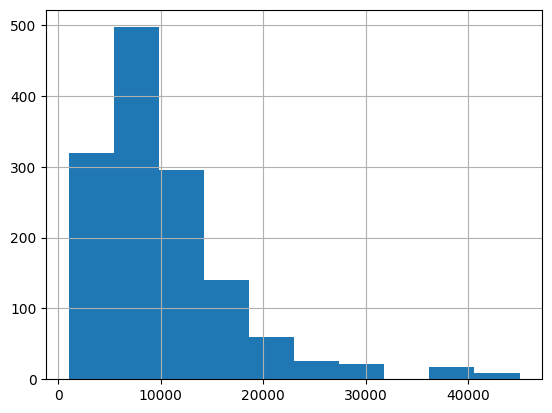

In [ ]:
dados['Faixa Salarial – numero'].hist()

In [ ]:
# Agrupamento por gênero e anos de experiência
# Cálculo da média por anos de experiência e gênero
media_anos_experiencia = dados.groupby(['Genero', 'Anos experiencia'])['Faixa Salarial – numero'].mean()
media_anos_experiencia.head()

Genero    Anos experiencia
Feminino  Mais de 10 anos     15083.333333
          Menos de 1 ano       5388.888889
          de 1 a 2 anos        7540.229885
          de 2 a 3 anos        9512.195122
          de 4 a 5 anos       11685.714286
Name: Faixa Salarial – numero, dtype: float64

In [ ]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_anos_experiencia = media_anos_experiencia.reset_index(name='Salario Medio')
media_anos_experiencia.head()

,Genero,Anos experiencia,Salario Medio
0,Feminino,Mais de 10 anos,15083.333333
1,Feminino,Menos de 1 ano,5388.888889
2,Feminino,de 1 a 2 anos,7540.229885
3,Feminino,de 2 a 3 anos,9512.195122
4,Feminino,de 4 a 5 anos,11685.714286


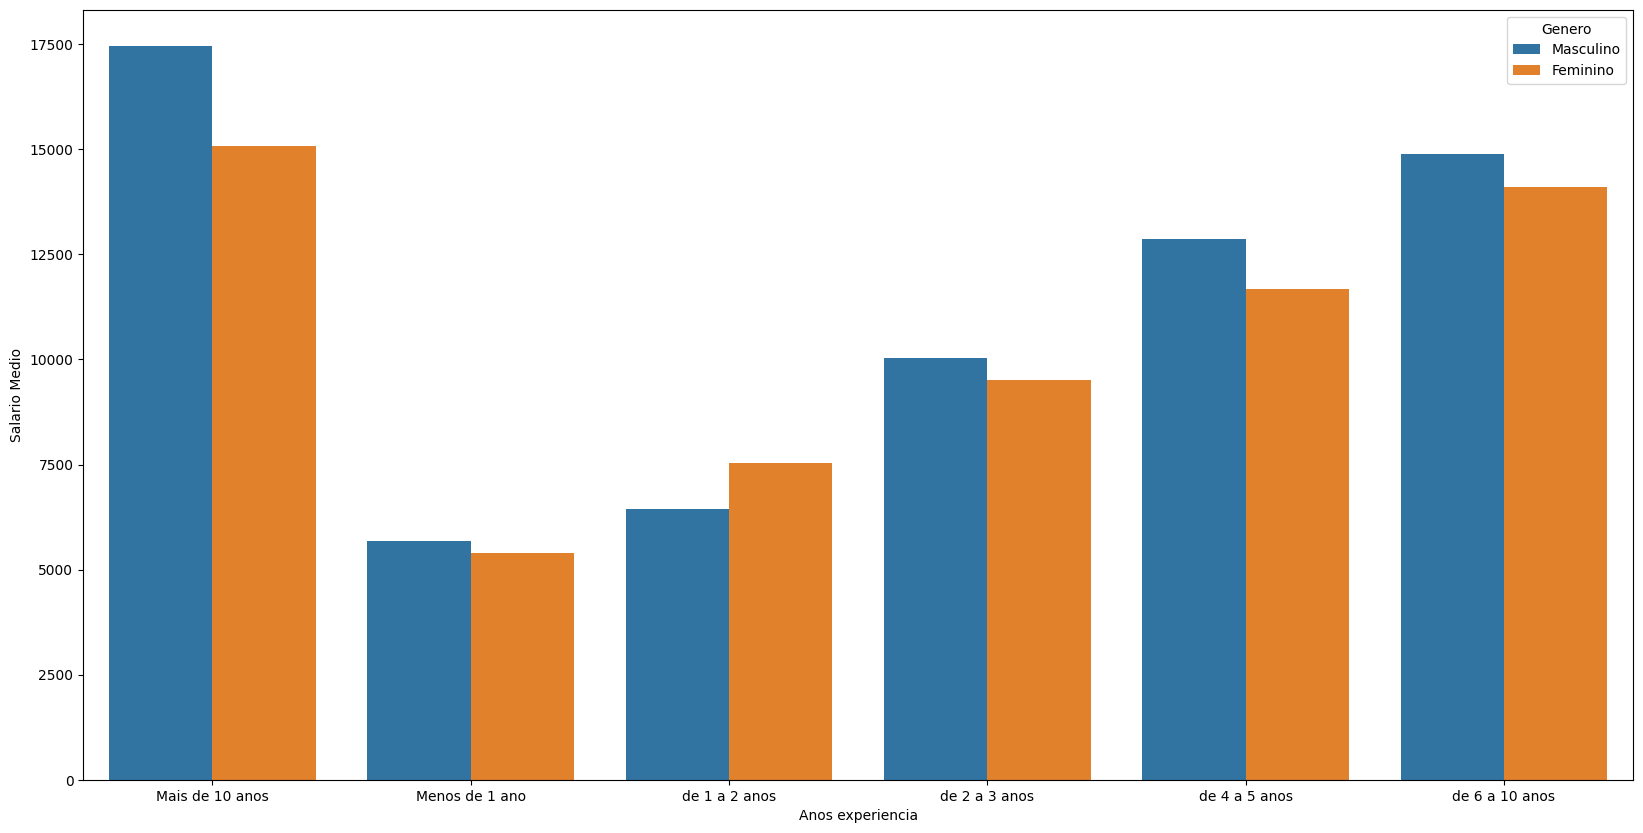

In [ ]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='Anos experiencia', y='Salario Medio', hue='Genero', data=media_anos_experiencia, hue_order=['Masculino', 'Feminino']);

In [ ]:
# Agrupamento por gênero e nível de escolaridade
# Cálculo da média por nível de escolaridade e gênero
media_nivel_escolaridade = dados.groupby(['Genero', 'Nivel Ensino'])['Faixa Salarial – numero'].mean()
media_nivel_escolaridade = media_nivel_escolaridade.reset_index(name='Salario Medio')

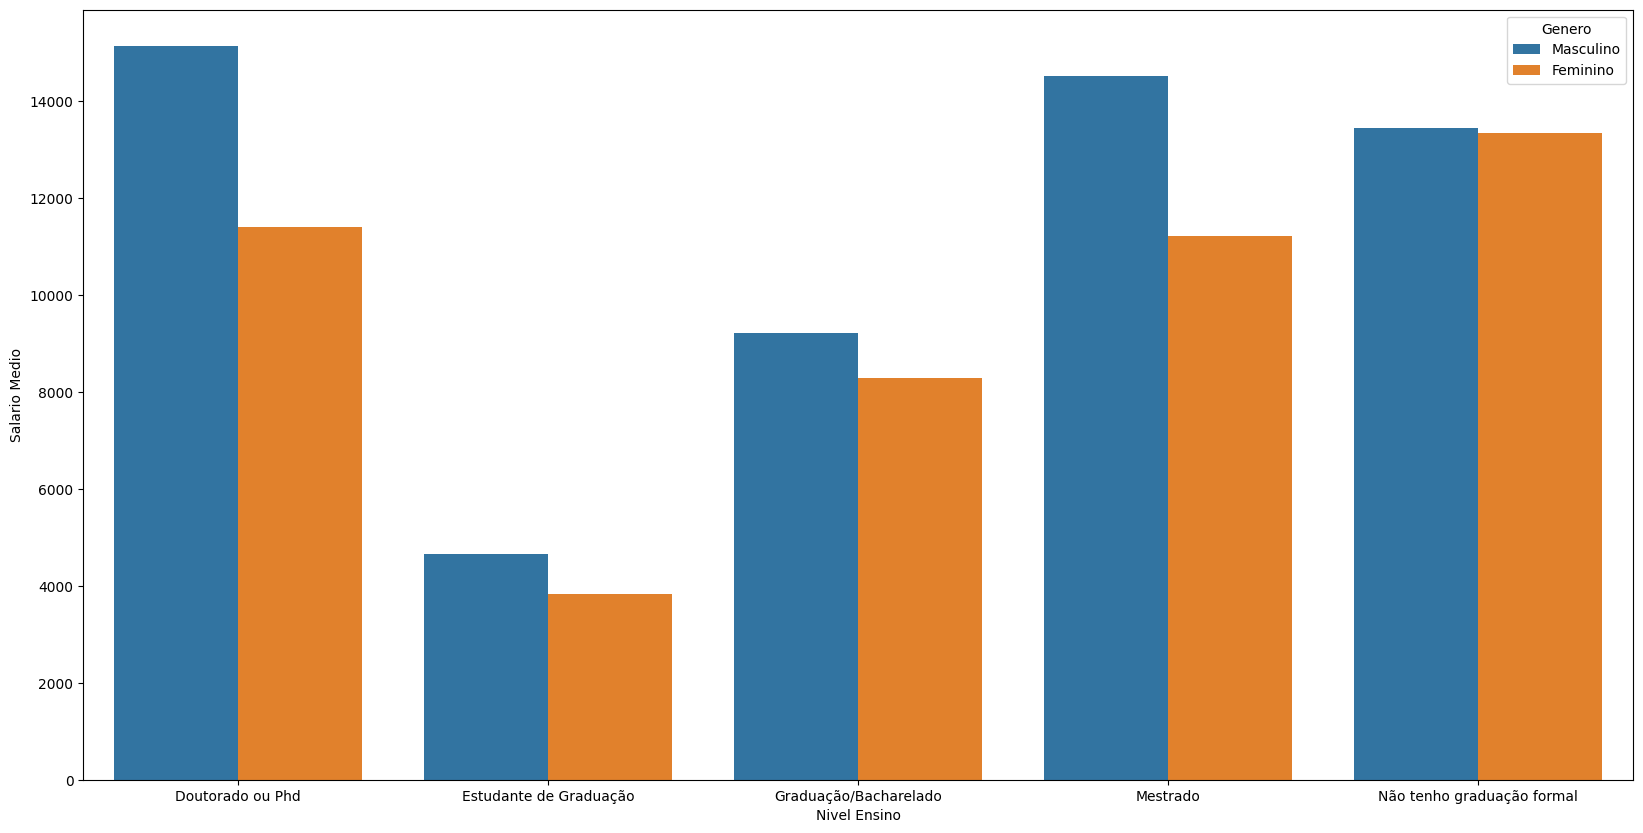

In [ ]:
# Gráfico da média salarial por nível de escolaridade
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel Ensino', y='Salario Medio', hue='Genero', data=media_nivel_escolaridade,
order=['Doutorado ou Phd', 'Estudante de Graduação', 'Graduação/Bacharelado','Mestrado', 'Não tenho graduação formal'], 
hue_order=['Masculino', 'Feminino']);

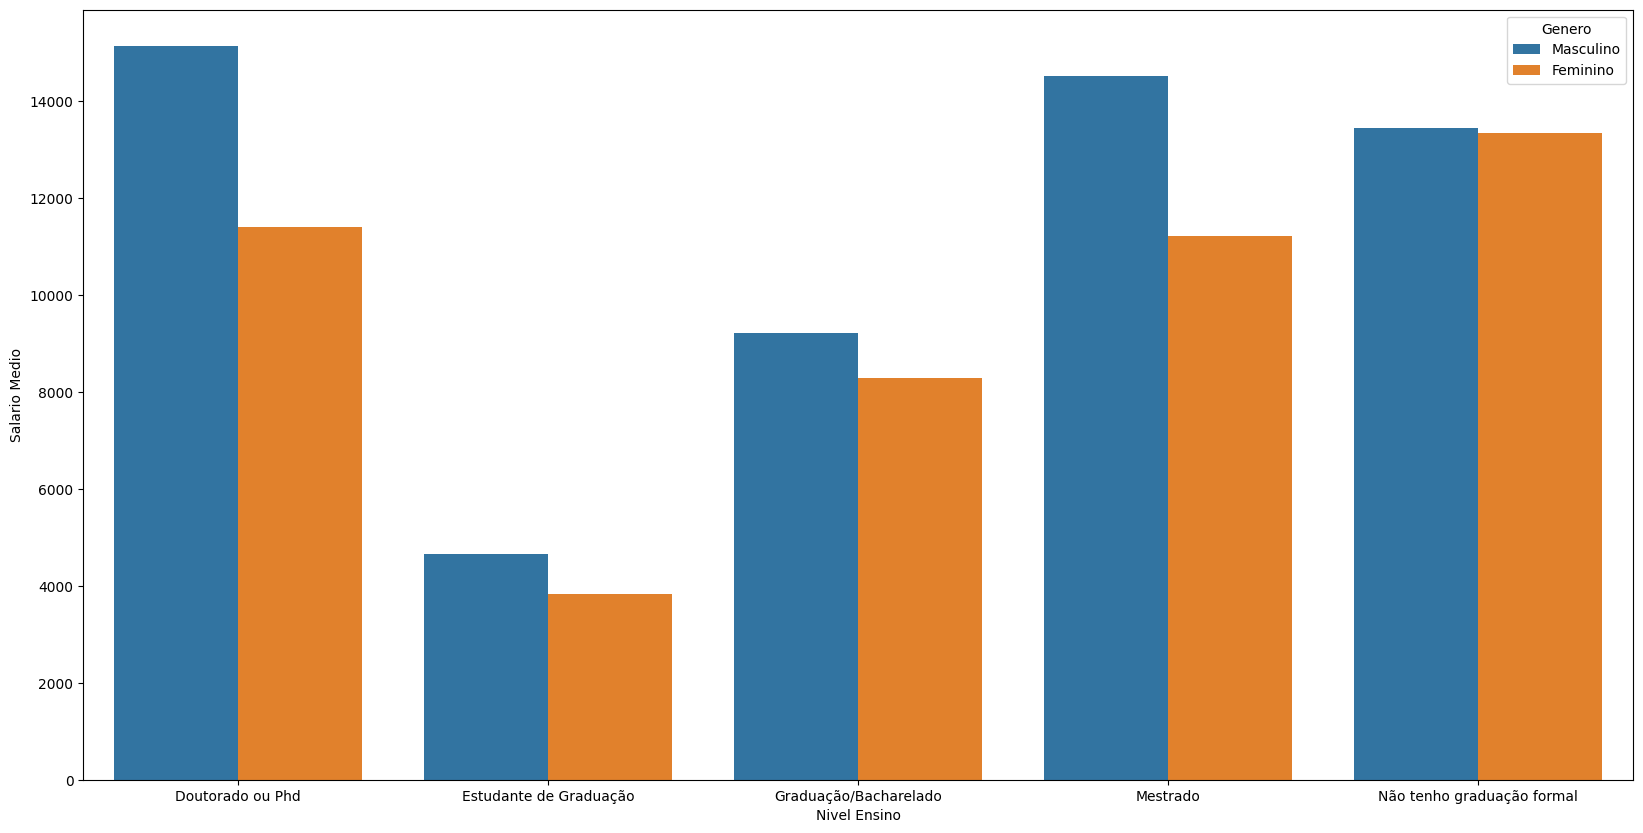

In [ ]:
# Gráfico da média salarial por nível de escolaridade
plt.figure(figsize=(20,10))
sns.barplot(x='Nivel Ensino', y='Salario Medio', hue='Genero', data=media_nivel_escolaridade,
order=['Doutorado ou Phd', 'Estudante de Graduação', 'Graduação/Bacharelado','Mestrado', 'Não tenho graduação formal'], 
hue_order=['Masculino', 'Feminino']);

# 2. Divisão dos dados

In [5]:
dados['Genero'] = LabelEncoder().fit_transform(dados['Genero'])
dados.head()

NameError: name 'LabelEncoder' is not defined

In [ ]:
# Função para atribuir valores numericos para com base nos anos de experiencia

def atribuir_valor_numeriico(categoria):
    if categoria == 'Menos de 1 ano':
        return 1
    elif categoria == '1 a 2 anos':
        return 1.5
    elif categoria == '2 a 3 anos':
        return 3.5
    elif categoria == '4 a 5 anos':
        return 4.5
    elif categoria == '6 a 10 anos':
        return 8
    elif categoria == 'Mais de 10 anos':
        return 15
    else:
        return None

dados['Anos experiencia - numerico'] = dados['Anos experiencia'].apply(atribuir_valor_numeriico)

In [ ]:
# Nome
dados.columns

In [4]:
# Variaveis dados_num contém apenas variaveis numéricas de interesse (exclui o restante)
dados_num = dados.drop(['Nivel Ensino', 'Area Formacao', 'Setor', 'Nivel',
                       'Faixa Salarial', 'Anos experiencia',
                       'Data ultimo aumento', 'Média Salarial', 'Data ultimo aumento - Ano'], axis=1)
dados_num.head()

KeyError: "['Média Salarial', 'Data ultimo aumento - Ano'] not found in axis"

In [ ]:
sns.heatmap(dados_num.corr('spearman'), annot=True)
plt.title('Correlação entre variáveis numéricas \n', fontsize=15)
plt.show()